In [17]:
from __future__ import print_function, division
from builtins import range

import matplotlib.pyplot as plt
import numpy as np

NUM_TRIALS = 10000
PES = 0.1
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]

In [20]:
class Bandit:
    def __init__(self, p):
        self.p = p
        self.p_estimate = 5.
        self.N = 1.

    def pull(self):
        return np.random.random() < self.p

    def update(self, x):
        self.N = self.N + 1
        #self.p_estimate = self.p_estimate + (1/self.N) * (x - self.p_estimate)
        self.p_estimate = ((self.N - 1) * self.p_estimate + x) / self.N

mean estimate: 0.7142857142857143
mean estimate: 0.7272727272727273
mean estimate: 0.7422329124072968
total reward earned: 7409.0
overall win rate: 0.7409
num times selected each bandit: [14.0, 11.0, 9978.0]


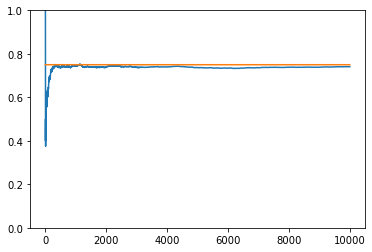

In [21]:
def experiment():
    bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]

    rewards = np.zeros(NUM_TRIALS)
    for i in range(NUM_TRIALS):
        # use optimistic initial values to select the next bandit
        j = np.argmax([b.p_estimate for b in bandits])

        x = bandits[j].pull()
        rewards[i] = x
        bandits[j].update(x)

    for b in bandits:
        print("mean estimate:", b.p_estimate)

    print("total reward earned:", rewards.sum())
    print("overall win rate:", rewards.sum() / NUM_TRIALS)
    print("num times selected each bandit:", [b.N for b in bandits])

    cumulative_rewards = np.cumsum(rewards)
    win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
    plt.ylim([0, 1])
    plt.plot(win_rates)
    plt.plot(np.ones(NUM_TRIALS) * np.max(BANDIT_PROBABILITIES))
    plt.show()

experiment()


